# <strong><u>MULTIPLE LINEAR REGRESSION</u>:</strong>

---

In [1]:
# Importing necessary modules

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## <strong><u>Exploratory Data Analysis</u>:</strong>


<span style="background-color: #ADD8E6; color: #000; padding: 4px 8px; border-radius: 4px; font-weight: bold;">REMINDER</span>: The objective of the exploratory phase is to determine which variables are viable candidates as independent variables, via which the dependent/target variable can be predicted.
<br>
<br>
<br>

In [170]:
# Loading and previewing the dataset
dfa = pd.read_csv("..//..//..//..//..//csv_datasets//mReg_FuelConsumptionCo2.csv")

dfa.head(20)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [75]:
# Searching for candidates with continuous distributions pt. 1

dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [76]:
# Searching for candidates with continuous distributions pt. 2

dfa.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [77]:
# Extracting candidates with continuous distributions

dfb = dfa[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dfb.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


---

## <strong><u>Exploring Linearity of Feature Candidates</u>:</strong>

The following attributes are candidates for features for the machine learning model:

<ol>
<li> <i>ENGINESIZE</i>
<li> <i>CYLINDERS</i>
<li> <i>FUELCONSUMPTION_CITY</i>
<li> <i>FUELCONSUMPTION_HWY</i>
<li> <i>FUELCONSUMPTION_COMB</i>
</ol>
<br>
<br>
<br>

<strong><u>ENGINE SIZE</u>:</strong>

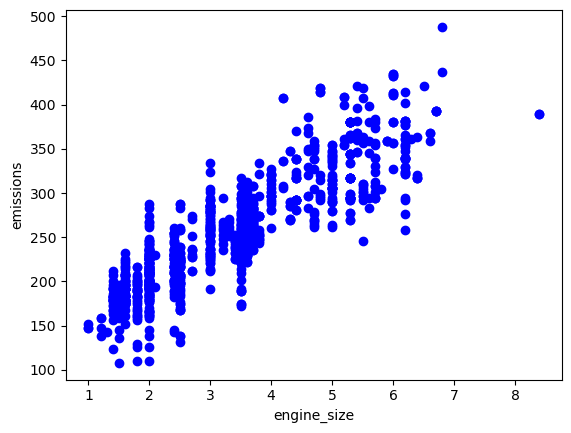

In [78]:
# Engine Size in relation to Emissions

plt.scatter(dfb.ENGINESIZE, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('engine_size')
plt.ylabel('emissions')
plt.show()

<strong><u>CYLINDERS</u>:</strong>

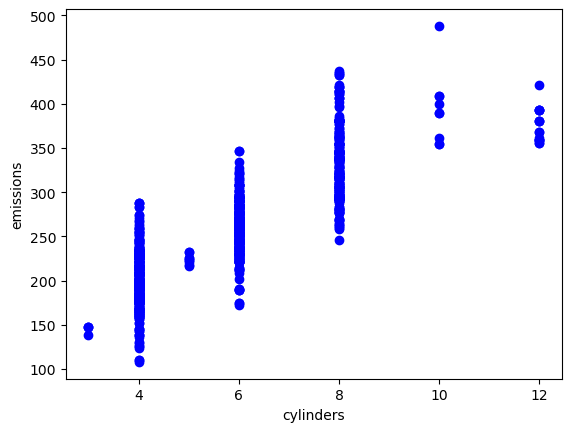

In [79]:
# Cylinders in relation to Emissions

plt.scatter(dfb.CYLINDERS, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('cylinders')
plt.ylabel('emissions')
plt.show()

<span style="background-color: #ADD8E6; color: #000; padding: 4px 8px; border-radius: 4px; font-weight: bold;">SIDE NOTE</span>: The above reltionship may serve some use with <strong>logistic rergession</strong>, however this will <strong>not</strong> be of good use with linear regression
<br>
<br>
<br>

<strong><u>FUEL CONSUMPTION CITY</u>:</strong>

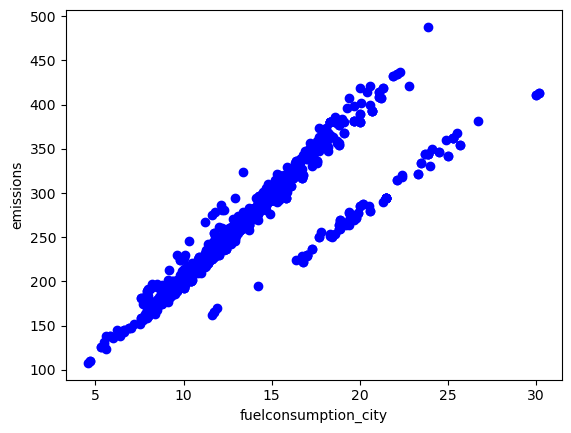

In [80]:
# Fuel Consumption City in relation to Emissions

plt.scatter(dfb.FUELCONSUMPTION_CITY, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('fuelconsumption_city')
plt.ylabel('emissions')
plt.show()

<strong><u>FUEL CONSUMPTION HWY</u>:</strong>

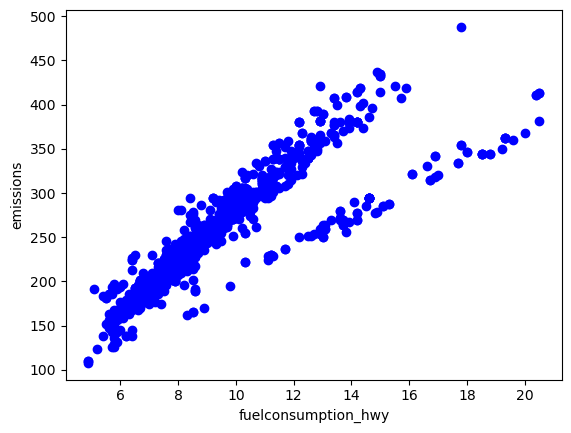

In [81]:
# Cylinders in relation to Emissions

plt.scatter(dfb.FUELCONSUMPTION_HWY, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_HWY'.lower())
plt.ylabel('emissions')
plt.show()

<strong><u>FUEL CONSUMPTION COMB</u>:</strong>

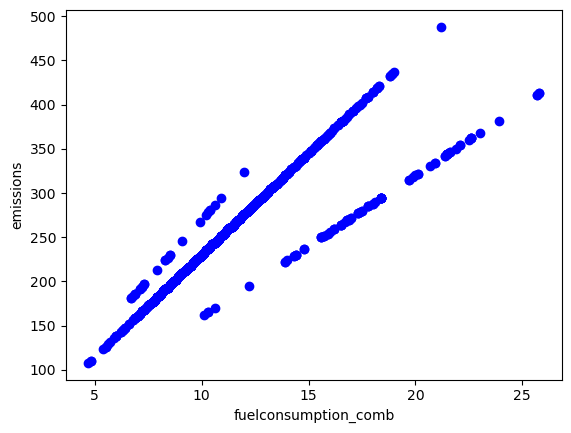

In [82]:
# Cylinders in relation to Emissions

plt.scatter(dfb.FUELCONSUMPTION_COMB, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB'.lower())
plt.ylabel('emissions')
plt.show()

Out of the above, we can<strong> only use the following</strong> as features:

<ol>
<ol>
<li> <i>ENGINESIZE</i>
<li> <i>FUELCONSUMPTION_CITY</i>
<li> <i>FUELCONSUMPTION_HWY</i>
<li> <i>FUELCONSUMPTION_COMB</i>
</ol>
</ol>

---

## <strong><u>Developing the M.L.R. Model</u>:</strong>

In [83]:
dfa.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
# Generating randomized mask betweeon 0 and 1
msk1 = np.random.rand(len(dfb)) < 0.8

# Generating train and test sets
train1 = dfb[msk1]
test1 = dfb[~msk1]


# Setting up dependent and independent variables
train1_x = train1[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
train1_y = train1[['CO2EMISSIONS']]

test1_x = test1[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
test1_y = test1[['CO2EMISSIONS']]

- Coefficiens: [[ 19.27912742 -10.03390046 -12.28563062  31.07908791]]
- Intercept: [81.82379009]


### <strong><u>Confirming suitable relationships between dependent and independent variables</u>:</strong>

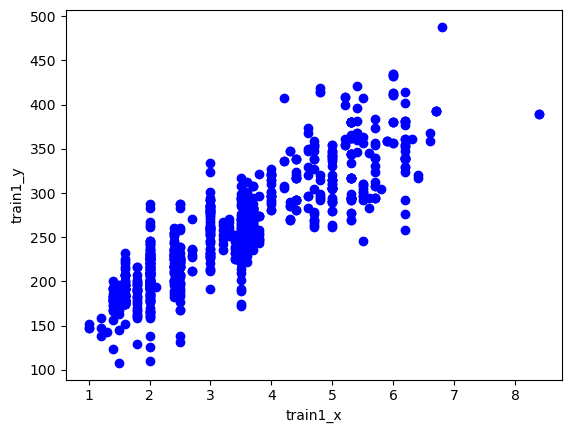

In [172]:
# Checking via Engine Size

plt.scatter(train1_x['ENGINESIZE'], train1_y, color='blue')
plt.xlabel('train1_x')
plt.ylabel('train1_y')
plt.show()

### <strong><u>Training the M.L.R. Model</u>:</strong>

<Axes: >

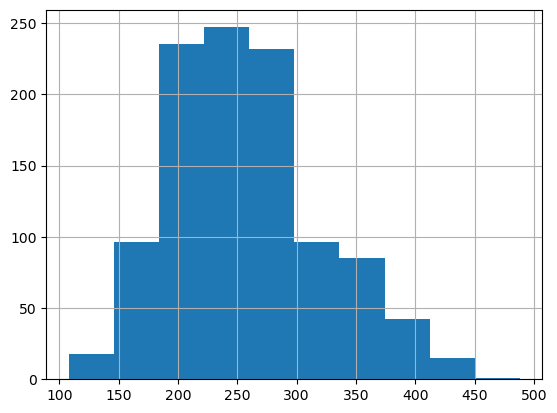

In [169]:
dfa['CO2EMISSIONS'].hist()

In [150]:
from sklearn import linear_model

# Instantiated linear regression model
regr1 = linear_model.LinearRegression()

# Training linear model
regr1.fit(train1_x, train1_y)

# Previewing hyperlane coefficients and intercept
print(f"- Coefficiens: {regr1.coef_}\n"
      f"- Intercept: {regr1.intercept_}")

- Coefficiens: [[ 19.27912742 -10.03390046 -12.28563062  31.07908791]]
- Intercept: [81.82379009]


### <strong><u>Testing the M.L.R. Model</u>:</strong>

In [154]:
# Testing the model
test1_y_ = regr1.predict(test1_x)

### <strong><u>Evaluating the M.L.R. Model</u>:</strong>

In [163]:
# Evaluating the model
from sklearn.metrics import r2_score

print(f"- Mean Absolute Error: {np.mean(np.abs(test1_y_ - test1_y))}")
print(f"- Mean-Squared Error: {np.mean(np.square(test1_y_ - test1_y))}")
print(f"- Root Mean Squared Error: {np.sqrt(np.mean(np.square(test1_y_ - test1_y)))}")
print(f"\n- R-Score: {r2_score(test1_y_, test1_y)}")

- Mean Absolute Error: 18.095869177008296
- Mean-Squared Error: 628.7381305607634
- Root Mean Squared Error: 25.07465115531547

- R-Score: 0.7907898573475765


## <strong><u>Conclusions</u>:</strong>

$R^2$: 
- The model <code>regr1</code> achieved an $R^2$ value of <strong>0.79</strong>, explaining approximately 79\% of the variance in $CO_2$ emissions. 
- This suggests the model captures a substantial portion of the underlying relationship, though <strong>there is still room for improvement</strong>.

$RMSE$: 
- The model <code>regr1</code> achieved a RMSE of approx. <strong>25.07</strong>, indicating on average that the model's predictions will differ from the actual $CO_2$ emissions by about 25 units.
- <strong>Depending on the scale of the emissions data</strong>, this may be acceptable or may indicate a need for further refinement in the model or additional features.